# Telecom Churn Case Study


##### The main objective of this case study is to predict the High profile customers at high risk of Churn and the factors for the same in India and South East Asia. We will use the usage-based definition to define churn. We have used a DataSet that contains the data for four months and predict the churn for the fourth month. The dataset can be categorized in such a way that in the first two months the customer is in "Good phase", the third month is the "Action Phase" and the fourth month is the "Churn Phase". The definitions for the same are as follows:

##### 1.Good Phase -- In this phase, the customer is happy with the service and behaves as usual.
##### 2.Action Phase -- The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc.
##### 3.Churn Phase -- In this phase, the customer is said to have churned.


In [220]:
##Importing the required libraries
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Set the value of the max rows and columns that you would need in the data
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [221]:
#Reading the data
df_1=pd.read_csv("telecom_churn_data.csv")
df_1.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

In [222]:
#Get the shape(rows and columns) of the data
df_1.shape

(99999, 226)

In [223]:
#Display the datatypes of each column
print(df_1.dtypes)

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [224]:
#Describe the dataframe
df_1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000,99999.000,98981.000,98981.000,98981.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.00

In [225]:
#Validating if there are any null values in the data
df_1.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [226]:
#Null values in percentage would be an easier way to look at the data
round(100*(df_1.isnull().sum()/len(df_1.index)), 2)

mobile_number               0.000
circle_id                   0.000
loc_og_t2o_mou              1.020
std_og_t2o_mou              1.020
loc_ic_t2o_mou              1.020
last_date_of_month_6        0.000
last_date_of_month_7        0.600
last_date_of_month_8        1.100
last_date_of_month_9        1.660
arpu_6                      0.000
arpu_7                      0.000
arpu_8                      0.000
arpu_9                      0.000
onnet_mou_6                 3.940
onnet_mou_7                 3.860
onnet_mou_8                 5.380
onnet_mou_9                 7.750
offnet_mou_6                3.940
offnet_mou_7                3.860
offnet_mou_8                5.380
offnet_mou_9                7.750
roam_ic_mou_6               3.940
roam_ic_mou_7               3.860
roam_ic_mou_8               5.380
roam_ic_mou_9               7.750
roam_og_mou_6               3.940
roam_og_mou_7               3.860
roam_og_mou_8               5.380
roam_og_mou_9               7.750
loc_og_t2t_mou

In [227]:
#70% of the data is unavailable and the data is numerical so can be filled with zero.This means the user has no recharge for the mmonth
df_1[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6',
         'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]=df_1[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6',
         'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].fillna(0)

In [228]:
#Function to calculate high value customers
def prime_cust():
    sum=df_1['total_rech_amt_6']+df_1['total_rech_amt_7']+df_1['av_rech_amt_data_6']+df_1['av_rech_amt_data_7']
    df_1['Avg_rech_67']=sum/4
    threshold_rech=df_1['Avg_rech_67'].quantile(0.70)
    global df_prime
    df_prime=df_1.loc[df_1['Avg_rech_67']>threshold_rech]
    return df_prime.shape
    
    

In [229]:
#Calling the above function to segregate high value customers
prime_cust()

(29949, 227)

In [230]:
df_prime.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.

In [231]:
#In the below command
#-Date values are dropped
#-mu=inutes of usage with respect to network and incoming outgoing calls were removed 
#as their total value already existed in the dataset
df_prime=df_prime.drop(['std_og_t2c_mou_6','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
              'std_ic_t2o_mou_8','std_og_t2c_mou_8','loc_og_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_7',
             'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
              'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
              'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9','std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8','loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'],axis=1)

In [232]:
df_prime.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67
0,7000842753,109,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.000,1.000,1.000,0.000,252.000,252.000,252.000,nan,0.000,0.000,0.000,nan,1.000,1.000,1.000,nan,252.000,252.000,252.000,0.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,nan,968,30.400,0.000,101.200,3.580,279.500
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.840,54.680,52.290,nan,453.430,567.160,325.910,nan,16.230,33.490,31.640,nan,23.740,12.590,38.060,nan,nan,nan,nan,nan,422.160,533.910,255.790,nan,60.860,75.140,77.840,nan,0.000,0.180,10.010,nan,4.500,0.000,6.500,nan,0.000,0.000,0.000,nan,487.530,609.240,350.160,0.000,nan,nan,nan,427.880,355.230,188.040,nan,180.540,173.080,193.940,nan,626.460,558.040,428.740,0.000,0.210,0.000,0.000,nan,2.060,14.530,31.590,nan,15.740,15.190,15.140,nan,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,802,57.740,19.380,18.740,0.000,592.500
8,7001524846,109,378.721,492.223,137.362,166.787,413.690,351.030,35.080,33.460,94.660,80.630,136.480,108.710,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.130,34.580,0.000,0.000,378.090,288.180,63.040,60.710,130.260,143.480,98.

In [233]:
#max rech data can be filled wih zero i.e there was no recharge for that month
df_prime[['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']]=\
df_prime[['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].fillna(0)

In [234]:
#Setting up new categories for categorical pca
df_prime[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']]=\
df_prime[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']].fillna(-1)

In [235]:
#Setting up new categories for categorical pca
df_prime[['fb_user_6','fb_user_7','fb_user_8','fb_user_9']]=\
df_prime[['fb_user_6','fb_user_7','fb_user_8','fb_user_9']].fillna(-1)

In [236]:
#Finding missing values percentage again
round(100*(df_prime.isnull().sum()/len(df_prime.index)), 2)

mobile_number         0.000
circle_id             0.000
arpu_6                0.000
arpu_7                0.000
arpu_8                0.000
arpu_9                0.000
onnet_mou_6           1.650
onnet_mou_7           1.620
onnet_mou_8           3.630
onnet_mou_9           6.060
offnet_mou_6          1.650
offnet_mou_7          1.620
offnet_mou_8          3.630
offnet_mou_9          6.060
roam_ic_mou_6         1.650
roam_ic_mou_7         1.620
roam_ic_mou_8         3.630
roam_ic_mou_9         6.060
roam_og_mou_6         1.650
roam_og_mou_7         1.620
roam_og_mou_8         3.630
roam_og_mou_9         6.060
loc_og_t2t_mou_9      6.060
loc_og_t2m_mou_9      6.060
loc_og_t2f_mou_9      6.060
loc_og_t2c_mou_9      6.060
loc_og_mou_6          1.650
loc_og_mou_7          1.620
loc_og_mou_8          3.630
loc_og_mou_9          6.060
std_og_mou_6          1.650
std_og_mou_7          1.620
std_og_mou_8          3.630
std_og_mou_9          6.060
isd_og_mou_6          1.650
isd_og_mou_7        

### Creating New Features

In [237]:
#Calculate Average Revenue per user[arpu] for all months
df_prime['arpu'] = (df_prime['arpu_6'] + df_prime['arpu_7'] + df_prime['arpu_8'] + df_prime['arpu_9'])/4

In [238]:
#Total usage on calls for each customer
df_prime['TotalCallusage']=df_prime['total_ic_mou_6']+df_prime['total_og_mou_6']+df_prime['total_ic_mou_7']+df_prime['total_og_mou_7']+df_prime['total_ic_mou_8']+df_prime['total_og_mou_8']+df_prime['total_ic_mou_9']+df_prime['total_og_mou_9']

In [242]:
#Calculate customers network usage in the CHURN PHASE
df_prime['Usagechurnphase'] = df_prime['total_ic_mou_9'] + df_prime['total_og_mou_9'] + df_prime['vol_2g_mb_9']+df_prime['vol_3g_mb_9']

In [243]:
#Filter the High Value customers where the recharge amount is grater than 368.5
df_prime['churn'] = np.where((df_prime[['Usagechurnphase']] != 0), 0, 1)
df_prime.head(15)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67,arpu,TotalCallusage,Usagechurnphase,churn
0,7000842753,109,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,nan,1.000,1.000,1.000,nan,252.000,252.000,252.000,0.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,-1.000,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,-1.000,968,30.400,0.000,101.200,3.580,279.500,161.776,5.440,0.000,1
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.840,54.680,52.290,nan,453.430,567.160,325.910,nan,16.230,33.490,31.640,nan,23.740,12.590,38.060,nan,nan,nan,nan,nan,422.160,533.910,255.790,nan,60.860,75.140,77.840,nan,0.000,0.180,10.010,nan,4.500,0.000,6.500,nan,0.000,0.000,0.000,nan,487.530,609.240,350.160,0.000,nan,nan,nan,427.880,355.230,188.040,nan,180.540,173.080,193.940,nan,626.460,558.040,428.740,0.000,0.210,0.000,0.000,nan,2.060,14.530,31.590,nan,15.740,15.190,15.140,nan,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,-1.000,-1.000,-1.000,-1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000,-1.000,-1.000,-1.000,802,57.740,19.380,18.740,0.000,592.500,1522.628,3060.170,0.000,1
8,7001524846,109,378.721,492.223,137.362,166.787,413.690,351.030,35.080,33.460,94.660,80.630,136.480,1

In [ ]:
#Getting the churn count values
df_prime.churn.value_counts()

In [245]:
#This field wlll contain churn data so removing.
df_prime=df_prime.drop('Usagechurnphase',axis=1)

In [246]:
#Now removing all the observations pertaining to last month(i.e.., the churn phase)
df_prime = df_prime[df_prime.columns.drop(list(df_prime.filter(regex='_9')))]
df_prime.shape

(29949, 119)

In [248]:
#Processing categorical columns so that PCA can be done
col=['fb_user_6','fb_user_7','fb_user_8']
for i in col:
    A=pd.DataFrame(df_prime[[i,'churn']].groupby(i).count()).reset_index()
    B=df_prime[[i,'churn']].groupby(i).sum().reset_index()
    final=A.merge(B,on=i,how='inner')
    final['churn_rate'+'_'+i]=final['churn_y']/(final['churn_x'])
    df_prime=df_prime.merge(final,on=i,how='inner')
    df_prime[i]=df_prime['churn_rate'+'_'+i]
    df_prime.head()
df_prime=df_prime.drop(df_prime.filter(regex='churn_'),axis=1)
    
    
   





In [249]:
#Processing categorical columns so that PCA can be done
col_ngt=['night_pck_user_6','night_pck_user_7','night_pck_user_8']
for i in col_ngt:
    A=pd.DataFrame(df_prime[[i,'churn']].groupby(i).count()).reset_index()
    B=df_prime[[i,'churn']].groupby(i).sum().reset_index()
    final=A.merge(B,on=i,how='inner')
    final['churn_rate'+'_'+i]=final['churn_y']/(final['churn_x'])
    df_prime=df_prime.merge(final,on=i,how='inner')
    df_prime[i]=df_prime['churn_rate'+'_'+i]
    df_prime.head()
df_prime=df_prime.drop(df_prime.filter(regex='churn_'),axis=1)

In [250]:
df_prime.isnull().sum()

mobile_number             0
circle_id                 0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6             494
onnet_mou_7             486
onnet_mou_8            1086
offnet_mou_6            494
offnet_mou_7            486
offnet_mou_8           1086
roam_ic_mou_6           494
roam_ic_mou_7           486
roam_ic_mou_8          1086
roam_og_mou_6           494
roam_og_mou_7           486
roam_og_mou_8          1086
loc_og_mou_6            494
loc_og_mou_7            486
loc_og_mou_8           1086
std_og_mou_6            494
std_og_mou_7            486
std_og_mou_8           1086
isd_og_mou_6            494
isd_og_mou_7            486
isd_og_mou_8           1086
spl_og_mou_6            494
spl_og_mou_7            486
spl_og_mou_8           1086
og_others_6             494
og_others_7             486
og_others_8            1086
total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
loc_ic_mou_6        

In [251]:
#Imputing the rest of the missing values with 0 
df_prime = df_prime.fillna(0)

## Exploratory Data Analysis


In [252]:
df_prime.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67,arpu,TotalCallusage,churn
0,7000842753,109,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,3,2,362,252,252,252,252,252,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,212.170,212.170,212.170,212.170,212.170,212.170,0.063,0.053,0.028,0,0,0,0,0,0,1,1,1,0,0,0,0.062,0.052,0.023,968,30.400,0.000,101.200,3.580,279.500,161.776,5.440,1
1,7002180748,109,452.624,320.548,368.807,34.460,43.110,50.610,131.590,90.610,84.310,0.000,0.000,0.000,0.000,0.000,0.000,166.060,130.460,128.510,0.000,0.000,1.930,0.000,0.000,0.000,1.150,6.780,6.330,2.260,0.000,0.000,169.480,137.240,136.780,185.160,135.840,163.760,0.000,0.000,0.000,185.190,135.840,163.760,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12,25,25,528,380,410,154,30,30,20,30,25,2.000,12.000,16.000,154.000,25.000,25.000,2.000,12.000,16.000,0.000,0.000,0.000,308.000,300.000,400.000,516.340,216.860,603.580,1530.460,522.950,226.170,0.420,15.150,16.010,-0.640,17.000,20.130,0.063,0.053,0.028,2,0,0,0,12,16,0,0,0,0,0,0,0.062,0.052,0.023,729,277.970,535.630,1459.450,0.000,379.000,355.922,1281.110,0
2,7001682585,109,1201.298,687.704,602.052,61.230,7.390,62.890,165.410,211.310,168.010,0.000,0.000,0.000,0.000,0.000,0.000,182.080,152.610,147.410,32.680,3.030,61.660,0.000,0.000,0.000,11.880,63.060,21.830,0.000,0.000,0.000,226.640,218.710,230.910,320.510,447.810,403.960,46.840,2.810,29.260,367.360,450.630,433.710,0.000,0.000,0.000,0.000,0.000,0.480,0.000,0.000,0.000,10,6,5,1389,905,606,655,655,455,655,655,0,4.000,1.000,1.000,655.000,655.000,455.000,1.000,0.000,0.000,3.000,1.000,1.000,1311.000,655.000,455.000,94.090,22.650,16.460,3144.970,5473.240,4798.660,924.160,559.250,392.470,856.400,559.220,389.000,0.063,0.053,0.028,0,0,0,1,0,0,2,1,1,1,0,0,0.062,0.052,0.023,3106,1799.090,3649.390,1892.320,0.000,1065.000,1005.166,3301.660,0
3,7000152517,109,565.516,390.307,430.911,178.410,226.810,170.110,186.680,45.080,145.080,0.000,0.000,0.000,0.000,0.000,0.000,365.090,259.830,307.990,0.000,12.060,7.200,0.000,0.000,0.000,2.160,2.860,1.210,2.580,0.000,0.000,369.840,274.760,316.410,913.040,822.360,990.540,1.260,4.930

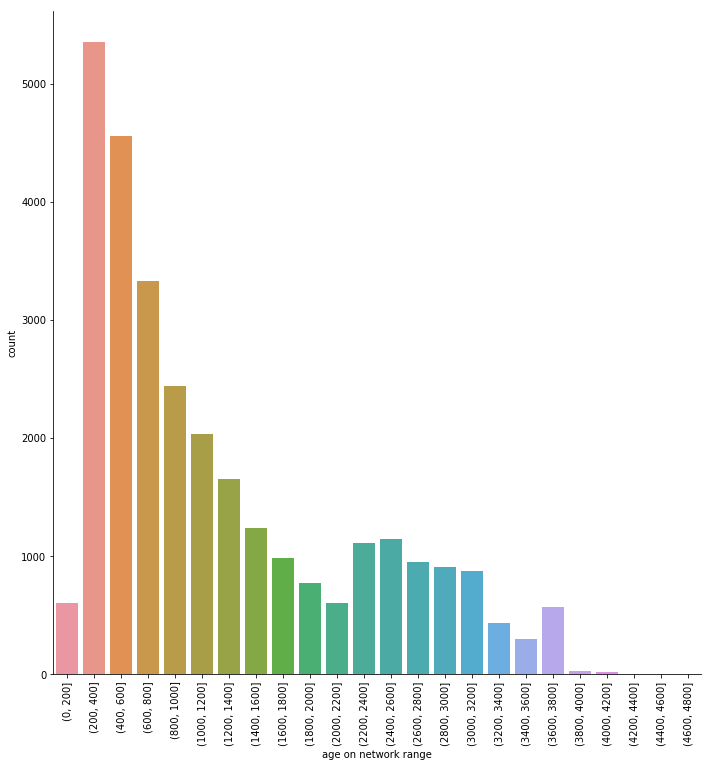

In [253]:
#Analysis of age on network
s=df_prime['aon'].sort_values()
cuts = np.arange(0,5000, 200)
aon_df=pd.DataFrame(pd.cut(s, cuts))
g=sns.factorplot("aon",data=aon_df,kind='count',size=10,aspect=1)
g.set_titles("Analysis of Age on Network")
g.set_xticklabels(rotation=90)
g.set_xlabels('age on network range')

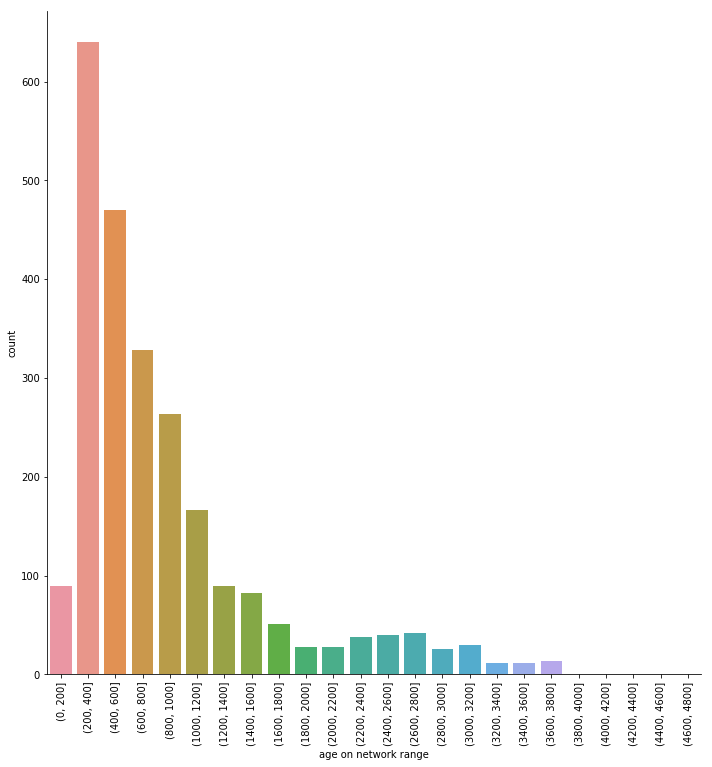

In [254]:
#Maximum churners are on the network for 200-400 days
#also a strategic problem is old customers are also churning
df_aon_1=df_prime.loc[df_prime['churn']==1,['aon','churn']]
cuts = np.arange(0,5000, 200)
df_aon_1['aon_range']=pd.cut(df_aon_1['aon'],cuts)
df_aon_1.sort_values(['aon','aon_range','churn'])
g=sns.factorplot("aon_range",data=df_aon_1,kind='count',size=10,aspect=1)
g.set_titles("Analysis of Age on Network wrt to churned customers")
g.set_xticklabels(rotation=90)
g.set_xlabels('age on network range')


In [255]:
df_prime.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67,arpu,TotalCallusage,churn
0,7000842753,109,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,3,2,362,252,252,252,252,252,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,212.170,212.170,212.170,212.170,212.170,212.170,0.063,0.053,0.028,0,0,0,0,0,0,1,1,1,0,0,0,0.062,0.052,0.023,968,30.400,0.000,101.200,3.580,279.500,161.776,5.440,1
1,7002180748,109,452.624,320.548,368.807,34.460,43.110,50.610,131.590,90.610,84.310,0.000,0.000,0.000,0.000,0.000,0.000,166.060,130.460,128.510,0.000,0.000,1.930,0.000,0.000,0.000,1.150,6.780,6.330,2.260,0.000,0.000,169.480,137.240,136.780,185.160,135.840,163.760,0.000,0.000,0.000,185.190,135.840,163.760,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12,25,25,528,380,410,154,30,30,20,30,25,2.000,12.000,16.000,154.000,25.000,25.000,2.000,12.000,16.000,0.000,0.000,0.000,308.000,300.000,400.000,516.340,216.860,603.580,1530.460,522.950,226.170,0.420,15.150,16.010,-0.640,17.000,20.130,0.063,0.053,0.028,2,0,0,0,12,16,0,0,0,0,0,0,0.062,0.052,0.023,729,277.970,535.630,1459.450,0.000,379.000,355.922,1281.110,0
2,7001682585,109,1201.298,687.704,602.052,61.230,7.390,62.890,165.410,211.310,168.010,0.000,0.000,0.000,0.000,0.000,0.000,182.080,152.610,147.410,32.680,3.030,61.660,0.000,0.000,0.000,11.880,63.060,21.830,0.000,0.000,0.000,226.640,218.710,230.910,320.510,447.810,403.960,46.840,2.810,29.260,367.360,450.630,433.710,0.000,0.000,0.000,0.000,0.000,0.480,0.000,0.000,0.000,10,6,5,1389,905,606,655,655,455,655,655,0,4.000,1.000,1.000,655.000,655.000,455.000,1.000,0.000,0.000,3.000,1.000,1.000,1311.000,655.000,455.000,94.090,22.650,16.460,3144.970,5473.240,4798.660,924.160,559.250,392.470,856.400,559.220,389.000,0.063,0.053,0.028,0,0,0,1,0,0,2,1,1,1,0,0,0.062,0.052,0.023,3106,1799.090,3649.390,1892.320,0.000,1065.000,1005.166,3301.660,0
3,7000152517,109,565.516,390.307,430.911,178.410,226.810,170.110,186.680,45.080,145.080,0.000,0.000,0.000,0.000,0.000,0.000,365.090,259.830,307.990,0.000,12.060,7.200,0.000,0.000,0.000,2.160,2.860,1.210,2.580,0.000,0.000,369.840,274.760,316.410,913.040,822.360,990.540,1.260,4.930

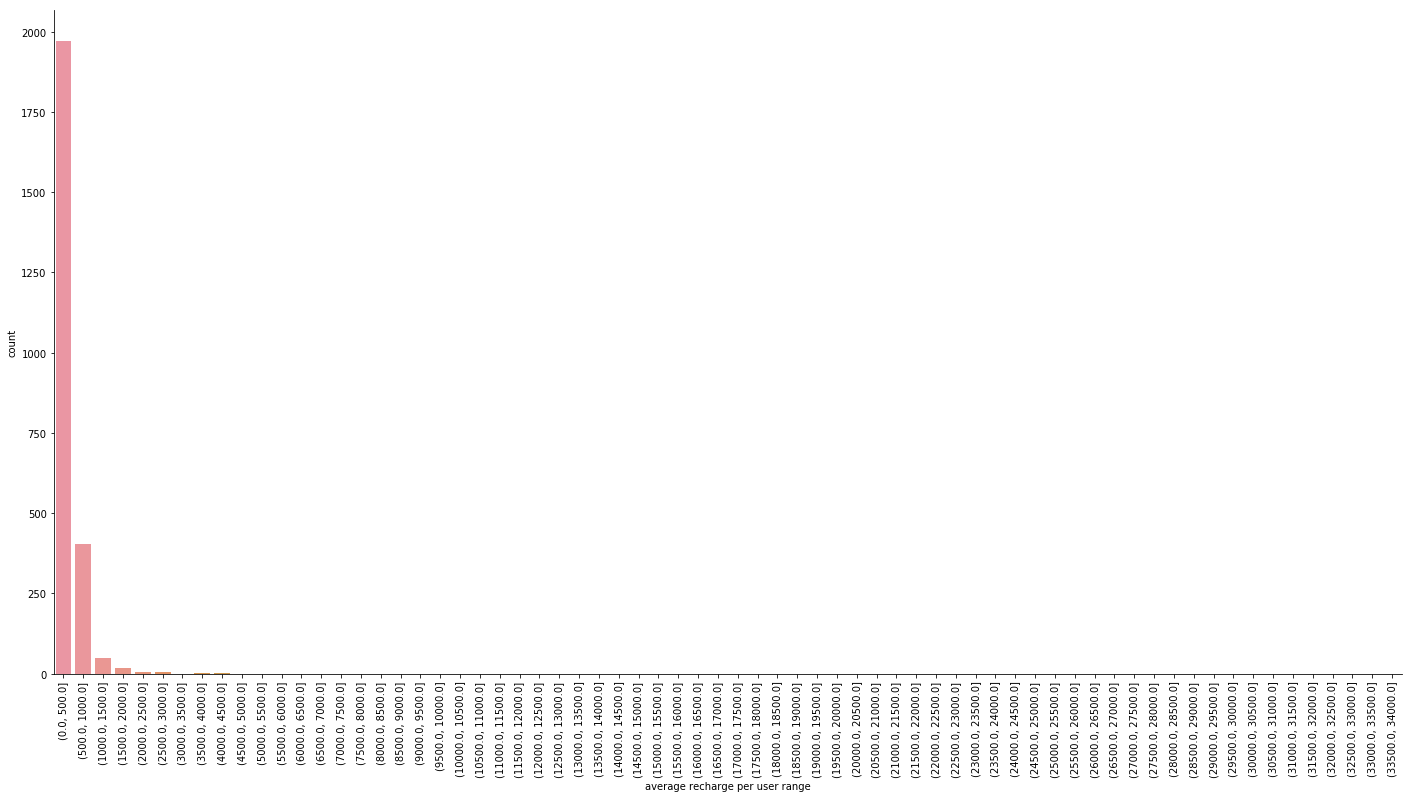

In [256]:
#Churning is highest among customers with average recharge of 0 to 1000
df_arpu=df_prime.loc[df_prime['churn']==1,['arpu','churn']]
cuts = np.arange(0,df_prime['arpu'].max()+500, 500)
df_arpu['arpu_range']=pd.cut(df_arpu['arpu'],cuts)
df_arpu.sort_values(['arpu','arpu_range','churn'])
g=sns.factorplot("arpu_range",data=df_arpu,kind='count',size=10,aspect=2)
g.set_titles("Analysis of Average rechange per user wrt to churned customers")
g.set_xticklabels(rotation=90)
g.set_xlabels('average recharge per user range')



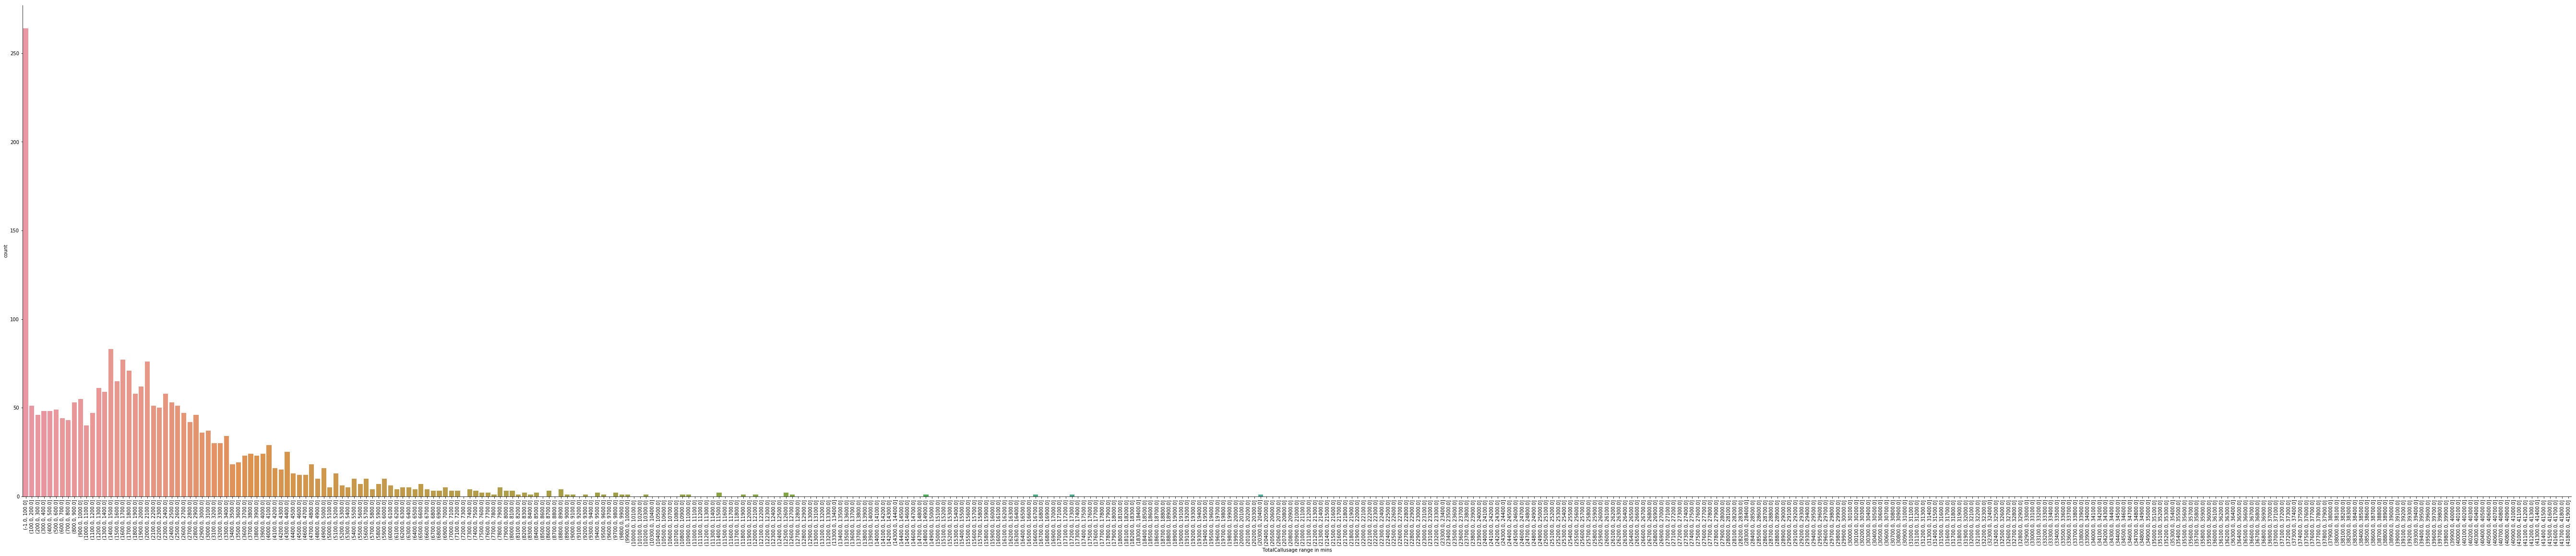

In [257]:
#Churning is highest among customers with total call usage of 0 to 100 minutes 
#It is steadily high in the mid ranges
#But it decreses as minutes increase
df_TotalCallusage=df_prime.loc[df_prime['churn']==1,['TotalCallusage','churn']]
cuts = np.arange(0,df_prime['TotalCallusage'].max()+1000, 100)
df_TotalCallusage['TotalCallusage_range']=pd.cut(df_TotalCallusage['TotalCallusage'],cuts,precision=0,include_lowest=True)
df_TotalCallusage.sort_values(['TotalCallusage','TotalCallusage_range','churn'])
#df_TotalCallusage['TotalCallusage_range']= df_TotalCallusage['TotalCallusage_range'].cat.add_categories([0])
#df_TotalCallusage['TotalCallusage_range'].fillna(0)
#df_TotalCallusage['TotalCallusage_range']=df_TotalCallusage['TotalCallusage_range'].astype('float')
g=sns.factorplot("TotalCallusage_range",data=df_TotalCallusage,kind='count',size=15,aspect=5)
g.set_titles("Analysis of Total Call Usage wrt to churned customers")
g.set_xticklabels(rotation=90)
g.set_xlabels('TotalCallusage range in mins')


## Feature Standardization

In [258]:
df_prime.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_67,arpu,TotalCallusage,churn
0,7000842753,109,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,3,2,362,252,252,252,252,252,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,0.000,0.000,0.000,1.000,1.000,1.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,212.170,212.170,212.170,212.170,212.170,212.170,0.063,0.053,0.028,0,0,0,0,0,0,1,1,1,0,0,0,0.062,0.052,0.023,968,30.400,0.000,101.200,3.580,279.500,161.776,5.440,1
1,7002180748,109,452.624,320.548,368.807,34.460,43.110,50.610,131.590,90.610,84.310,0.000,0.000,0.000,0.000,0.000,0.000,166.060,130.460,128.510,0.000,0.000,1.930,0.000,0.000,0.000,1.150,6.780,6.330,2.260,0.000,0.000,169.480,137.240,136.780,185.160,135.840,163.760,0.000,0.000,0.000,185.190,135.840,163.760,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12,25,25,528,380,410,154,30,30,20,30,25,2.000,12.000,16.000,154.000,25.000,25.000,2.000,12.000,16.000,0.000,0.000,0.000,308.000,300.000,400.000,516.340,216.860,603.580,1530.460,522.950,226.170,0.420,15.150,16.010,-0.640,17.000,20.130,0.063,0.053,0.028,2,0,0,0,12,16,0,0,0,0,0,0,0.062,0.052,0.023,729,277.970,535.630,1459.450,0.000,379.000,355.922,1281.110,0
2,7001682585,109,1201.298,687.704,602.052,61.230,7.390,62.890,165.410,211.310,168.010,0.000,0.000,0.000,0.000,0.000,0.000,182.080,152.610,147.410,32.680,3.030,61.660,0.000,0.000,0.000,11.880,63.060,21.830,0.000,0.000,0.000,226.640,218.710,230.910,320.510,447.810,403.960,46.840,2.810,29.260,367.360,450.630,433.710,0.000,0.000,0.000,0.000,0.000,0.480,0.000,0.000,0.000,10,6,5,1389,905,606,655,655,455,655,655,0,4.000,1.000,1.000,655.000,655.000,455.000,1.000,0.000,0.000,3.000,1.000,1.000,1311.000,655.000,455.000,94.090,22.650,16.460,3144.970,5473.240,4798.660,924.160,559.250,392.470,856.400,559.220,389.000,0.063,0.053,0.028,0,0,0,1,0,0,2,1,1,1,0,0,0.062,0.052,0.023,3106,1799.090,3649.390,1892.320,0.000,1065.000,1005.166,3301.660,0
3,7000152517,109,565.516,390.307,430.911,178.410,226.810,170.110,186.680,45.080,145.080,0.000,0.000,0.000,0.000,0.000,0.000,365.090,259.830,307.990,0.000,12.060,7.200,0.000,0.000,0.000,2.160,2.860,1.210,2.580,0.000,0.000,369.840,274.760,316.410,913.040,822.360,990.540,1.260,4.930

In [259]:
# Normalising continuous features

a=df_prime.columns.difference(['mobile_number', 'circle_id','churn'])

df=df_prime[a]



normalized_df=(df-df.mean())/df.std()

df_prime = df_prime.drop(a,axis=1)
              
df_prime_norm = pd.concat([df_prime,normalized_df],axis=1)

df_prime=df_prime_norm

df_prime.head()

,mobile_number,circle_id,churn,Avg_rech_67,TotalCallusage,aon,arpu,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,fb_user_6,fb_user_7,fb_user_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,7000842753,109,1,-0.458,-1.257,-0.285,-0.914,0.931,0.899,1.012,0.814,0.789,0.880,-0.845,-0.776,-0.627,-0.320,0.648,0.588,0.701,-0.419,-0.429,-0.423,0.532,0.462,0.501,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.159,-0.048,-0.047,-0.044,-0.391,-0.127,1.020,1.043,1.066,-0.759,-0.764,-0.727,-0.705,-0.712,-0.677,0.439,0.406,0.498,1.541,1.501,1.625,-0.405,-0.412,-0.379,1.280,1.174,1.278,-1.024,-0.996,-1.037,-0.823,-0.806,-0.734,-0.303,-0.016,-0.018,-0.600,-0.589,-0.537,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,-0.340,-0.353,-0.356,-0.192,-0.187,-0.169,-0.078,-0.331,-0.102,-0.227,-0.317,-0.322,-0.303,-0.353,-0.344,-0.330,-0.604,-0.604,-0.533,-0.823,-0.823,-0.785,-0.948,-0.941,-0.838,-0.587,-0.754,-0.579,-0.120,-0.158,-0.119,-0.826,-0.907,-0.846,-0.250,-0.335,-0.288,-0.272,-0.225,-0.251
1,7002180748,109,0,-0.093,-0.810,-0.531,-0.446,-0.388,-0.279,-0.243,-0.365,-0.285,-0.270,-0.277,-0.551,-0.315,0.270,0.926,0.819,1.456,0.504,4.622,6.797,-0.350,-0.339,-0.315,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.159,-0.048,-0.047,-0.044,0.814,3.136,-0.593,-0.529,-0.490,-0.168,-0.335,-0.214,-0.268,-0.367,-0.326,-0.125,-0.828,-0.788,0.681,-0.459,-0.410,4.215,-0.412,-0.379,-0.355,-0.347,-0.341,-1.024,-0.996,-1.037,-0.548,-0.623,-0.558,0.750,-0.016,-0.018,-0.525,-0.500,-0.428,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,-0.340,4.724,6.915,-0.192,-0.187,-0.169,-0.147,-0.174,-0.102,-0.227,-0.254,-0.017,-0.013,-0.353,-0.344,-0.330,-0.604,-0.604,-0.530,-0.314,-0.459,-0.347,-0.698,-0.747,-0.642,-0.284,-0.530,-0.319,0.272,3.766,5.417,0.015,1.397,1.609,1.258,0.332,1.714,1.310,0.181,-0.124
2,7001682585,109,0,2.427,-0.101,1.917,1.121,4.926,2.995,2.168,4.778,2.681,1.936,1.390,0.232,0.155,3.894,5.904,2.522,1.737,0.042,-0.429,-0.423,2.296,0.462,0.501,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.152,-0.048,-0.047,-0.044,7.820,4.176,3.821,3.898,-0.661,0.263,0.652,0.564,-0.226,-0.308,-0.274,2.757,2.646,1.675,5.074,4.981,3.445,-0.405,-0.412,-0.379,2.915,1.174,1.278,-1.024,-0.996,-1.037,-0.477,-0.379,-0.384,-0.303,-0.016,-0.018,-0.467,-0.574,-0.402,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,0.124,-0.353,-0.356,0.871,-0.187,-0.169,-0.147,-0.331,-0.102,-0.227,0.332,2.511,0.696,-0.017,-0.326,-0.123,-0.550,-0.599,-0.433,0.186,0.385,0.399,-0.614,-0.632,-0.507,1.287,0.390,0.005,1.057,-0.158,-0.119,-0.195,-0.593,-0.526,-0.052,-0.269,-0.252,3.075,5.587,4.847
3,7000152517,109,0,-

In [260]:
df_prime.shape

(29949, 119)

In [261]:
df_prime.head()


,mobile_number,circle_id,churn,Avg_rech_67,TotalCallusage,aon,arpu,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,fb_user_6,fb_user_7,fb_user_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,7000842753,109,1,-0.458,-1.257,-0.285,-0.914,0.931,0.899,1.012,0.814,0.789,0.880,-0.845,-0.776,-0.627,-0.320,0.648,0.588,0.701,-0.419,-0.429,-0.423,0.532,0.462,0.501,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.159,-0.048,-0.047,-0.044,-0.391,-0.127,1.020,1.043,1.066,-0.759,-0.764,-0.727,-0.705,-0.712,-0.677,0.439,0.406,0.498,1.541,1.501,1.625,-0.405,-0.412,-0.379,1.280,1.174,1.278,-1.024,-0.996,-1.037,-0.823,-0.806,-0.734,-0.303,-0.016,-0.018,-0.600,-0.589,-0.537,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,-0.340,-0.353,-0.356,-0.192,-0.187,-0.169,-0.078,-0.331,-0.102,-0.227,-0.317,-0.322,-0.303,-0.353,-0.344,-0.330,-0.604,-0.604,-0.533,-0.823,-0.823,-0.785,-0.948,-0.941,-0.838,-0.587,-0.754,-0.579,-0.120,-0.158,-0.119,-0.826,-0.907,-0.846,-0.250,-0.335,-0.288,-0.272,-0.225,-0.251
1,7002180748,109,0,-0.093,-0.810,-0.531,-0.446,-0.388,-0.279,-0.243,-0.365,-0.285,-0.270,-0.277,-0.551,-0.315,0.270,0.926,0.819,1.456,0.504,4.622,6.797,-0.350,-0.339,-0.315,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.159,-0.048,-0.047,-0.044,0.814,3.136,-0.593,-0.529,-0.490,-0.168,-0.335,-0.214,-0.268,-0.367,-0.326,-0.125,-0.828,-0.788,0.681,-0.459,-0.410,4.215,-0.412,-0.379,-0.355,-0.347,-0.341,-1.024,-0.996,-1.037,-0.548,-0.623,-0.558,0.750,-0.016,-0.018,-0.525,-0.500,-0.428,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,-0.340,4.724,6.915,-0.192,-0.187,-0.169,-0.147,-0.174,-0.102,-0.227,-0.254,-0.017,-0.013,-0.353,-0.344,-0.330,-0.604,-0.604,-0.530,-0.314,-0.459,-0.347,-0.698,-0.747,-0.642,-0.284,-0.530,-0.319,0.272,3.766,5.417,0.015,1.397,1.609,1.258,0.332,1.714,1.310,0.181,-0.124
2,7001682585,109,0,2.427,-0.101,1.917,1.121,4.926,2.995,2.168,4.778,2.681,1.936,1.390,0.232,0.155,3.894,5.904,2.522,1.737,0.042,-0.429,-0.423,2.296,0.462,0.501,-1.066,-1.025,-1.117,-0.085,-0.095,-0.097,-0.145,-0.152,-0.152,-0.048,-0.047,-0.044,7.820,4.176,3.821,3.898,-0.661,0.263,0.652,0.564,-0.226,-0.308,-0.274,2.757,2.646,1.675,5.074,4.981,3.445,-0.405,-0.412,-0.379,2.915,1.174,1.278,-1.024,-0.996,-1.037,-0.477,-0.379,-0.384,-0.303,-0.016,-0.018,-0.467,-0.574,-0.402,-0.215,-0.172,-0.174,-0.237,-0.217,-0.196,0.124,-0.353,-0.356,0.871,-0.187,-0.169,-0.147,-0.331,-0.102,-0.227,0.332,2.511,0.696,-0.017,-0.326,-0.123,-0.550,-0.599,-0.433,0.186,0.385,0.399,-0.614,-0.632,-0.507,1.287,0.390,0.005,1.057,-0.158,-0.119,-0.195,-0.593,-0.526,-0.052,-0.269,-0.252,3.075,5.587,4.847
3,7000152517,109,0,-

## PCA

In [262]:
from sklearn.model_selection import train_test_split

X=df_prime.drop(['churn','mobile_number','circle_id'],axis=1)

y=df_prime['churn']

y.head()


0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [263]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [264]:
X_train.shape

(20964, 116)

In [265]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [266]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [267]:
pca.components_

array([[  5.56362374e-02,  -9.85431586e-02,   5.99818092e-03, ...,
          1.54375281e-01,   1.66952180e-01,   1.64354353e-01],
       [  2.48591717e-01,   1.82355957e-01,   1.14752612e-02, ...,
          5.29990467e-02,   5.91221710e-02,   6.91638236e-02],
       [  3.73201272e-02,   6.96252811e-02,  -6.12276316e-02, ...,
         -4.55135434e-02,  -4.09559552e-02,  -3.45028960e-02],
       ..., 
       [ -0.00000000e+00,   2.02169879e-16,   3.02893244e-17, ...,
          2.09652867e-16,   5.96307310e-17,  -4.93753679e-17],
       [  0.00000000e+00,   7.87729221e-16,  -9.60458058e-17, ...,
          4.19861439e-17,  -1.06162409e-16,   2.93842807e-16],
       [  7.90943924e-01,   1.66533454e-16,   2.77555756e-17, ...,
          9.02056208e-17,   1.76074433e-16,  -1.24032729e-16]])

In [268]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,Feature,PC1,PC2
0,Avg_rech_67,0.056,0.249
1,TotalCallusage,-0.099,0.182
2,aon,0.006,0.011
3,arpu,-0.007,0.265
4,arpu_2g_6,0.161,0.067
5,arpu_2g_7,0.167,0.076
6,arpu_2g_8,0.165,0.086
7,arpu_3g_6,0.158,0.073
8,arpu_3g_7,0.164,0.082
9,arpu_3g_8,0.162,0.090


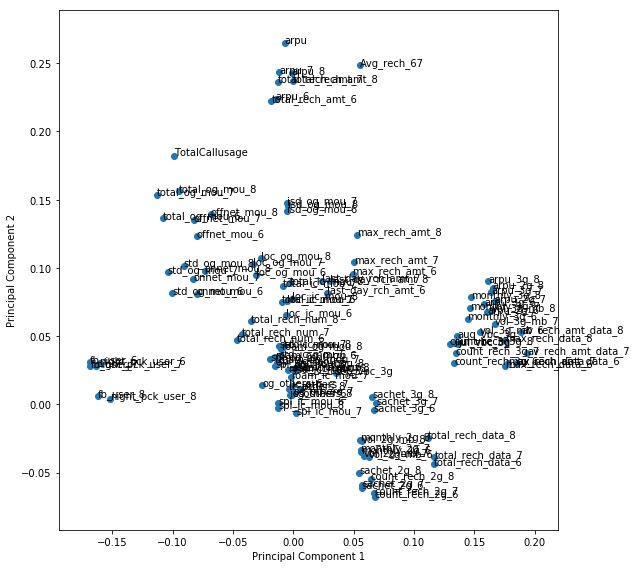

In [269]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

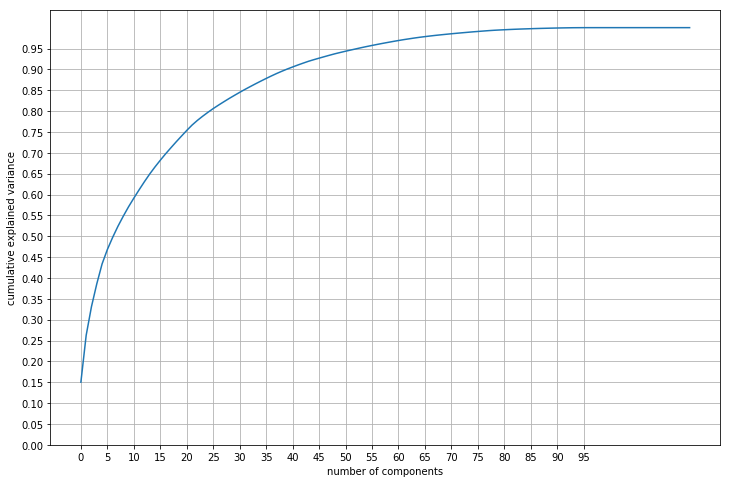

In [270]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 1, step=0.05))
plt.grid()
plt.show()

In [271]:
#Selecting 52 components as 95% variance can be explained
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=52)

In [272]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20964, 52)

## Sampling:
#### Using SMOTE to handle class imbalance. SMOTE creates synthetic records for the minority class and brings it on par with the majority class for further analysis.

In [273]:
 #Handling Class Imbalance using SMOTE Technique
#The. main advantage of SMOTE technique is to avoid potential loss of useful information in the DataSet
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
df_train_pca, y_train = sm.fit_sample(df_train_pca, y_train) 

## Modelling

#### We see previously that there exists a good amount of imbalance in the data with respect to the number of Churners and Non Churners. At this point with modelling accuracy is not a factor as there are hih number of Non Churns and the belwo methods are capturing that really well, accuracy will always be high.


#### But the business problem is the models should not identify someone who is about to churn as non churn. So in this case the recall needs to be looked at while also looking at a decent precision. So the best metric to use here is F1-score as it takes into consideration both Precison and recall.

## Performing logistic regression

In [274]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [275]:
#Applying selected components to the test data - 52 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8985, 52)

In [276]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.89'

In [277]:
y_pred

array([ 0.96574318,  0.09734892,  0.00377871, ...,  0.00881677,
        0.03246196,  0.93812726])

In [278]:
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
#y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df

,0
0,0.966
1,0.097
2,0.004
3,0.910
4,0.754
5,0.268
6,0.015
7,0.478
8,0.147
9,0.867


In [279]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,churn
21449,0
8922,0
15012,0
19843,0
28684,0
17051,0
1032,0
14632,0
10314,0
18993,0


In [280]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['ID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final=y_pred_final.set_index(['ID'])

In [281]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0.
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
ID,,,
21449,0,0.966,1
8922,0,0.097,0
15012,0,0.004,0
19843,0,0.910,1
28684,0,0.754,1


In [282]:
from sklearn import metrics

In [283]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6825, 1437],
       [ 122,  601]], dtype=int64)

In [284]:
# Predicted         Not_churn churn  
# Actual
# not_Churn            7404  858    
# churn                 40  683     


In [285]:
#Function to create ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate] or specificity')
    plt.ylabel('True Positive Rate or sensitivity or recall')
    plt.xticks(np.arange(0, 1, step=0.05))
    plt.yticks(np.arange(0, 1, step=0.05))
    plt.grid()
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

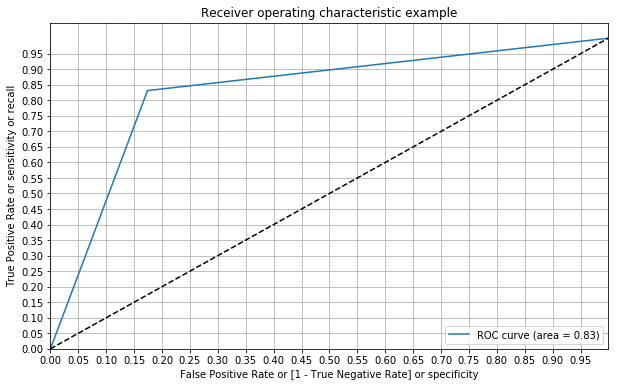

(array([ 0.        ,  0.17392883,  1.        ]),
 array([ 0.        ,  0.83125864,  1.        ]),
 array([2, 1, 0], dtype=int64))

In [286]:
#Create ROC curve
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [287]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      8262
          1       0.29      0.83      0.44       723

avg / total       0.93      0.83      0.86      8985



In [288]:
#Weighted average scores. F1 is 0.92
print("Log Reg Precision is",sklearn.metrics.precision_score(y_pred_final.churn, y_pred_final.predicted,average='weighted'))
print("Log Reg Recall is",sklearn.metrics.recall_score(y_pred_final.churn, y_pred_final.predicted,average='weighted'))
print("Log Reg  F1 score is",sklearn.metrics.f1_score(y_pred_final.churn, y_pred_final.predicted,average='weighted'))

Log Reg Precision is 0.927113753909
Log Reg Recall is 0.826488592098
Log Reg  F1 score is 0.860307244973


Average precision-recall score: 0.48


Text(0.5,1,'2-class Precision-Recall curve: AP=0.48')

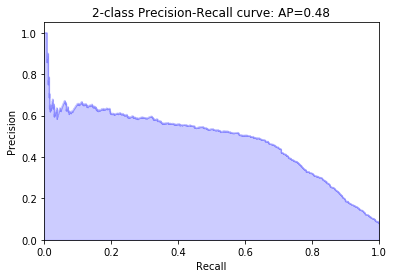

In [289]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

## Logistic Regression Cross Validation


In [290]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

learner_pca_cv = LogisticRegressionCV(Cs=7,cv=5)
model_pca_cv = learner_pca_cv.fit(df_train_pca,y_train)

In [291]:
#Applying selected components to the test data - 65 components
df_test_pca_cv = pca_final.transform(X_test)
df_test_pca_cv.shape

(8985, 52)

In [292]:
#Making prediction on the test data
y_pred_cv = model_pca_cv.predict_proba(df_test_pca_cv)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_cv))

'0.89'

In [293]:
y_pred_cv

array([ 0.96594245,  0.09739815,  0.00326277, ...,  0.00879592,
        0.03240068,  0.93816574])

In [294]:
y_pred_cv_df = pd.DataFrame(y_pred_cv)
# Converting to column dataframe
#y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_cv_df

,0
0,0.966
1,0.097
2,0.003
3,0.910
4,0.754
5,0.267
6,0.015
7,0.478
8,0.147
9,0.867


In [295]:
y_test_cv_df = pd.DataFrame(y_test)
y_test_cv_df

,churn
21449,0
8922,0
15012,0
19843,0
28684,0
17051,0
1032,0
14632,0
10314,0
18993,0


In [296]:
# Putting CustID to index
y_test_cv_df['ID'] = y_test_cv_df.index
# Removing index for both dataframes to append them side by side 
y_pred_cv_df.reset_index(drop=True, inplace=True)
y_test_cv_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_cv_final = pd.concat([y_test_cv_df,y_pred_cv_df],axis=1)
# Renaming the column 
y_pred_cv_final= y_pred_cv_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['ID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_cv_final=y_pred_cv_final.set_index(['ID'])

In [297]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_cv_final['predicted'] = y_pred_cv_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_cv_final.head()

,churn,Churn_Prob,predicted
ID,,,
21449,0,0.966,1
8922,0,0.097,0
15012,0,0.003,0
19843,0,0.910,1
28684,0,0.754,1


In [298]:
from sklearn import metrics

In [299]:
# Confusion matrix 
confusion_cv = metrics.confusion_matrix( y_pred_cv_final.churn, y_pred_cv_final.predicted )
confusion_cv

array([[6825, 1437],
       [ 122,  601]], dtype=int64)

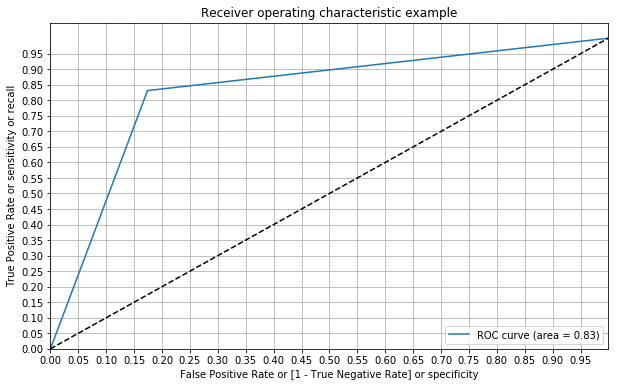

(array([ 0.        ,  0.17392883,  1.        ]),
 array([ 0.        ,  0.83125864,  1.        ]),
 array([2, 1, 0], dtype=int64))

In [300]:
draw_roc( y_pred_cv_final.churn, y_pred_cv_final.predicted )

In [301]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_cv_final.churn, y_pred_cv_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      8262
          1       0.29      0.83      0.44       723

avg / total       0.93      0.83      0.86      8985



In [302]:
print("Log Reg cv Precision is",sklearn.metrics.precision_score(y_pred_cv_final.churn, y_pred_cv_final.predicted,average='weighted'))
print("Log Reg cv Recall is",sklearn.metrics.recall_score(y_pred_cv_final.churn, y_pred_cv_final.predicted,average='weighted'))
print("Log Reg cv F1 score is",sklearn.metrics.f1_score(y_pred_cv_final.churn, y_pred_cv_final.predicted,average='weighted'))

 Log Reg cv Precision is 0.927113753909
Log Reg cv Recall is 0.826488592098
Log Reg cv F1 score is 0.860307244973


Average precision-recall score: 0.48


Text(0.5,1,'2-class Precision-Recall curve: AP=0.48')

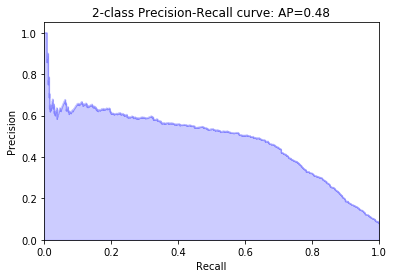

In [303]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_pred_cv)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred_cv)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

## Decision Tree Classifier

In [304]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
learner_pca_dt=DecisionTreeClassifier(max_depth=5)
model_pca_dt=learner_pca_dt.fit(df_train_pca,y_train)
#Applying selected components to the test data - 65 components
df_test_pca_dt = pca_final.transform(X_test)
df_test_pca_dt.shape
y_pred=learner_pca_dt.predict_proba(df_test_pca_dt)[:,1]


In [305]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.84'

## Grid Search to find optimal parameters


In [306]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
tree = grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.5min finished


In [307]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).shape

(16, 24)

In [308]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.838505926388
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [309]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_entropy.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [310]:
# accuracy score
clf_entropy.score(df_test_pca_dt,y_test)

0.81357818586533115

In [311]:
y_pred_dt=clf_entropy.predict(df_test_pca_dt)
y_pred_dt_1=clf_entropy.predict_proba(df_test_pca_dt)

In [312]:
# Confusion matrix 
confusion_cv = metrics.confusion_matrix( y_test, y_pred_dt )
confusion_cv

array([[6793, 1469],
       [ 206,  517]], dtype=int64)

In [313]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89      8262
          1       0.26      0.72      0.38       723

avg / total       0.91      0.81      0.85      8985



In [314]:
print("Decision Tree Precision is",sklearn.metrics.precision_score(y_test,y_pred_dt,average='weighted'))
print("Decision Tress Recall is",sklearn.metrics.recall_score(y_test,y_pred_dt,average='weighted'))
print("Decison Tree F1 score is",sklearn.metrics.f1_score(y_test,y_pred_dt,average='weighted'))

Decision Tree Precision is 0.913415625454
Decision Tress Recall is 0.813578185865
Decison Tree F1 score is 0.849321187255


In [315]:
print(accuracy_score(y_test,y_pred_dt))

0.813578185865


Average precision-recall score: 0.34


Text(0.5,1,'2-class Precision-Recall curve: AP=0.34')

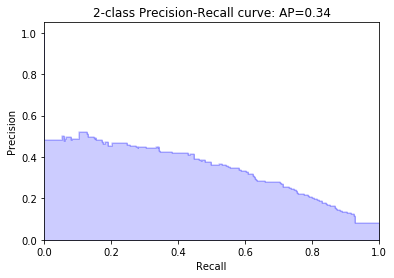

In [316]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_dt_1[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred_dt_1[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

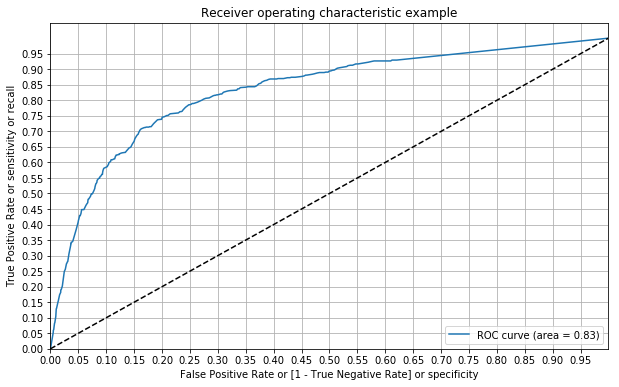

(array([ 0.        ,  0.00496248,  0.00520455,  0.00593077,  0.00617284,
         0.00726216,  0.00786734,  0.00956185,  0.0104091 ,  0.01089325,
         0.01331397,  0.01367708,  0.01404018,  0.01428226,  0.01646091,
         0.01718712,  0.01827645,  0.01839748,  0.01851852,  0.01936577,
         0.02130235,  0.02481239,  0.02662794,  0.02832244,  0.02868555,
         0.02929073,  0.03013798,  0.03098523,  0.03316388,  0.03631082,
         0.03655289,  0.036916  ,  0.03727911,  0.03800533,  0.0399419 ,
         0.04333091,  0.0456306 ,  0.04599371,  0.04950375,  0.050351  ,
         0.05071411,  0.05228758,  0.0530138 ,  0.05337691,  0.0547083 ,
         0.05543452,  0.05591866,  0.05785524,  0.05991285,  0.06366497,
         0.06560155,  0.06681191,  0.06705398,  0.06753813,  0.06826434,
         0.07177439,  0.07298475,  0.073832  ,  0.07419511,  0.07528443,
         0.0781893 ,  0.07939966,  0.07988381,  0.08085209,  0.08133624,
         0.08218349,  0.08327282,  0.08363592,  0.0

In [317]:
draw_roc( y_test,y_pred_dt_1[:,1] )

## Random Forest classifier

In [318]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced_subsample")
# fit
rfc.fit(df_train_pca,y_train)
# Making predictions
df_test_pca_rf=df_test_pca
y_pred = rfc.predict(df_test_pca_rf)
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,y_pred))
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95      8262
          1       0.45      0.50      0.47       723

avg / total       0.92      0.91      0.91      8985

[[7808  454]
 [ 358  365]]
0.909627156372


In [319]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 37.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [320]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.87146496153 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [412]:
##Tuning and finding Optimal Parameters
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [413]:
# predict
y_pred_rf = rfc.predict(df_test_pca)
y_pred_rf_1=rfc.predict_proba(df_test_pca)

In [414]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93      8262
          1       0.36      0.76      0.49       723

avg / total       0.93      0.87      0.89      8985



In [415]:
print("Random Forest weighted Precision is",sklearn.metrics.precision_score(y_test,y_pred_rf,average='weighted'))
print("Random Forest weighted Recall is",sklearn.metrics.recall_score(y_test,y_pred_rf,average='weighted'))
print("Random Forest weighted F1 score is",sklearn.metrics.f1_score(y_test,y_pred_rf,average='weighted'))
print("Random Forest weighted accuracy is",sklearn.metrics.accuracy_score(y_test,y_pred_rf))

Random Forest weighted Precision is 0.927054980362
Random Forest weighted Recall is 0.871341124096
Random Forest weighted F1 score is 0.891122179334
Random Forest weighted accuracy is 0.871341124096


Average precision-recall score: 0.46


Text(0.5,1,'2-class Precision-Recall curve: AP=0.46')

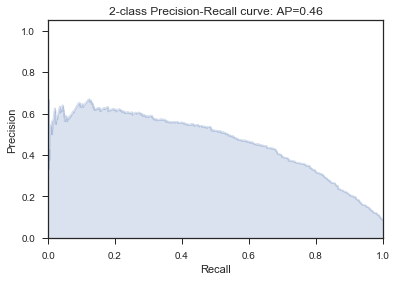

In [416]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_rf_1[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred_rf_1[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

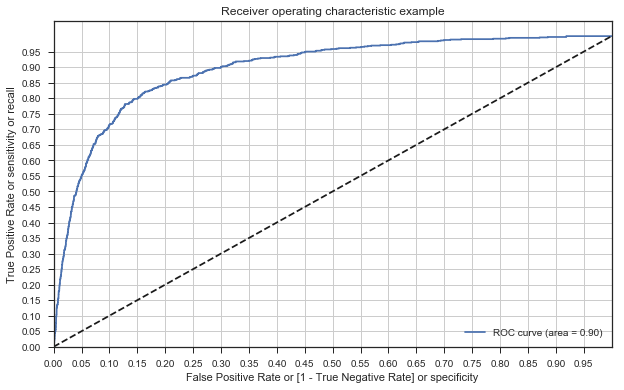

(array([  0.00000000e+00,   1.21036069e-04,   1.21036069e-04, ...,
          9.99757928e-01,   9.99878964e-01,   1.00000000e+00]),
 array([ 0.        ,  0.        ,  0.00138313, ...,  1.        ,
         1.        ,  1.        ]),
 array([ 1.9579105 ,  0.9579105 ,  0.95701679, ...,  0.01058904,
         0.0104805 ,  0.00971442]))

In [417]:
draw_roc( y_test,y_pred_rf_1[:,1] )

## XGBoost

In [327]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [328]:
boost=XGBClassifier()
boost.fit(df_train_pca,y_train)
df_test_pca_xb=df_test_pca

In [329]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xb = boost.predict_proba(df_test_pca_xb)
y_pred_xb.shape

(8985, 2)

In [330]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xb[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.79%


In [331]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=10, n_estimators=200)

# set up GridSearchCV()
xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    



In [332]:
# fit the model
xgb.fit(df_train_pca, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 23.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [333]:
# cv results
xgb_results = pd.DataFrame(xgb.cv_results_)
xgb_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,63.763,0.510,0.989,1.000,0.200,0.300,"{'learning_rate': 0.2, 'subsample': 0.3}",4,0.989,1.000,0.990,1.000,0.989,1.000,1.300,0.048,0.001,0.000
1,94.023,0.489,0.991,1.000,0.200,0.600,"{'learning_rate': 0.2, 'subsample': 0.6}",2,0.991,1.000,0.993,1.000,0.991,1.000,4.372,0.019,0.001,0.000
2,105.197,0.530,0.992,1.000,0.200,0.900,"{'learning_rate': 0.2, 'subsample': 0.9}",1,0.991,1.000,0.992,1.000,0.991,1.000,0.641,0.044,0.001,0.000
3,51.314,0.348,0.982,1.000,0.600,0.300,"{'learning_rate': 0.6, 'subsample': 0.3}",6,0.979,1.000,0.982,1.000,0.984,1.000,0.608,0.007,0.002,0.000
4,70.174,0.369,0.989,1.000,0.600,0.600,"{'learning_rate': 0.6, 'subsample': 0.6}",5,0.987,1.000,0.989,1.000,0.989,1.000,0.279,0.019,0.001,0.000
5,81.947,0.380,0.990,1.000,0.600,0.900,"{'learning_rate': 0.6, 'subsample': 0.9}",3,0.990,1.000,0.991,1.000,0.990,1.000,0.568,0.019,0.000,0.000


In [334]:
# convert parameters to int for plotting on x-axis
xgb_results['param_learning_rate'] = xgb_results['param_learning_rate'].astype('float')
#xgb_results['param_max_depth'] = xgb_results['param_max_depth'].astype('float')
xgb_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,63.763,0.510,0.989,1.000,0.200,0.300,"{'learning_rate': 0.2, 'subsample': 0.3}",4,0.989,1.000,0.990,1.000,0.989,1.000,1.300,0.048,0.001,0.000
1,94.023,0.489,0.991,1.000,0.200,0.600,"{'learning_rate': 0.2, 'subsample': 0.6}",2,0.991,1.000,0.993,1.000,0.991,1.000,4.372,0.019,0.001,0.000
2,105.197,0.530,0.992,1.000,0.200,0.900,"{'learning_rate': 0.2, 'subsample': 0.9}",1,0.991,1.000,0.992,1.000,0.991,1.000,0.641,0.044,0.001,0.000
3,51.314,0.348,0.982,1.000,0.600,0.300,"{'learning_rate': 0.6, 'subsample': 0.3}",6,0.979,1.000,0.982,1.000,0.984,1.000,0.608,0.007,0.002,0.000
4,70.174,0.369,0.989,1.000,0.600,0.600,"{'learning_rate': 0.6, 'subsample': 0.6}",5,0.987,1.000,0.989,1.000,0.989,1.000,0.279,0.019,0.001,0.000


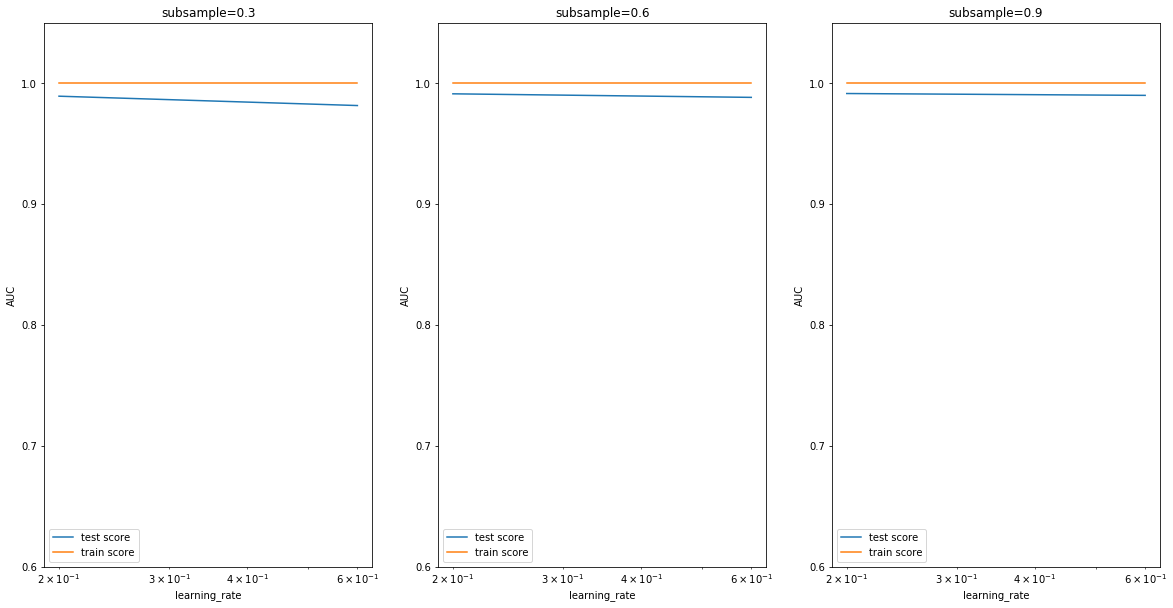

In [335]:
# # plotting
plt.figure(figsize=(20,10))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = xgb_results[xgb_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1.05])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

In [336]:
#We see that optimal solution will be learning rate as 0.2 and subsample as 0.3

In [353]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_final = XGBClassifier(params = params)
xgb_final.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.3, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [354]:
y_pred_xb=xgb_final.predict_proba(df_test_pca_xb)
y_pred_xb_1=xgb_final.predict(df_test_pca_xb)

In [355]:
y_pred_xb[:10]

array([[ 0.30264765,  0.69735235],
       [ 0.89804596,  0.10195405],
       [ 0.84745365,  0.15254635],
       [ 0.36518717,  0.63481283],
       [ 0.34153432,  0.65846568],
       [ 0.70033681,  0.29966319],
       [ 0.9364022 ,  0.0635978 ],
       [ 0.3750819 ,  0.6249181 ],
       [ 0.79792058,  0.20207943],
       [ 0.09305257,  0.90694743]], dtype=float32)

In [356]:
y_pred_xb_df=pd.DataFrame(y_pred_xb[:,1])

In [357]:
y_pred_xb_df=y_pred_xb_df.rename(columns={0:'pred'})
y_pred_xb_df.head()

,pred
0,0.697
1,0.102
2,0.153
3,0.635
4,0.658


In [358]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
21449,0
8922,0
15012,0
19843,0
28684,0


In [359]:
y_pred_xb_df['pred'] =y_pred_xb_df.pred.map( lambda x: 1 if x > 0.5 else 0)

In [360]:
y_pred_xb_df

,pred
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [361]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test_df, y_pred_xb_df)
auc

0.82263218796047688

In [362]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_df,y_pred_xb_df))

             precision    recall  f1-score   support

          0       0.98      0.85      0.91      8262
          1       0.32      0.80      0.45       723

avg / total       0.93      0.84      0.87      8985



## Plotting Precision Recall Curves


In [363]:
sklearn.metrics.precision_recall_fscore_support(y_test,y_pred_dt)

(array([ 0.97056722,  0.26032226]),
 array([ 0.82219802,  0.71507607]),
 array([ 0.8902431 ,  0.38169066]),
 array([8262,  723], dtype=int64))

Average precision-recall score: 0.50


Text(0.5,1,'2-class Precision-Recall curve: AP=0.50')

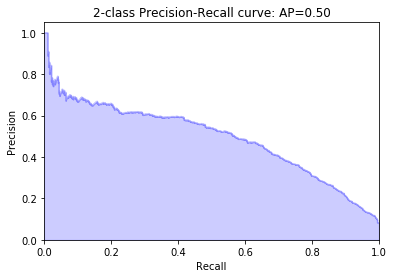

In [364]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_xb[:, 1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred_xb[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

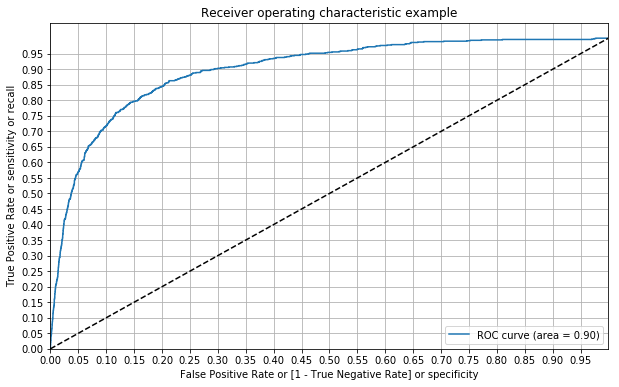

(array([ 0.        ,  0.        ,  0.        , ...,  0.99975793,
         0.99987896,  1.        ]),
 array([ 0.00138313,  0.00276625,  0.00414938, ...,  1.        ,
         1.        ,  1.        ]),
 array([ 0.96191108,  0.96091485,  0.95762759, ...,  0.00345842,
         0.00340716,  0.00296046], dtype=float32))

In [365]:
draw_roc( y_test,y_pred_xb[:,1] )

In [366]:
print(" XGBOOST Precision is",sklearn.metrics.precision_score(y_test,y_pred_xb_1,average='weighted'))
print(" XGBOOST Recall is",sklearn.metrics.recall_score(y_test,y_pred_xb_1,average='weighted'))
print(" XGBOOST F1 score is",sklearn.metrics.f1_score(y_test,y_pred_xb_1,average='weighted'))



 XGBOOST Precision is 0.92601765519
 XGBOOST Recall is 0.844407345576
 XGBOOST F1 score is 0.872518725227


## Comparing classification report for all the models
### Results

If we see the F1 score for Random Forest it is the highest with 0.49 for the churn class. We are certainly trading it off with the precision which currently stands at 0.36 while the recall is high at 0.76. 

Note:Please see the Random Forest Classification report

We can consider ramdom forest for this classification. With some more gridsearch which requires some additional computing power the optimal solution can be achieved.

Random Forest weighted Precision is 0.927054980362

Random Forest weighted Recall is 0.871341124096

Random Forest weighted F1 score is 0.891122179334

Random Forest weighted accuracy is 0.871341124096

Area under ROC for Random Forest is 0.90

In [367]:
# Logistic Regression
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      8262
          1       0.29      0.83      0.44       723

avg / total       0.93      0.83      0.86      8985



In [368]:
#Logistic Regression with CV
from sklearn.metrics import classification_report
print(classification_report(y_pred_cv_final.churn, y_pred_cv_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      8262
          1       0.29      0.83      0.44       723

avg / total       0.93      0.83      0.86      8985



In [369]:
#Decision Trees
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89      8262
          1       0.26      0.72      0.38       723

avg / total       0.91      0.81      0.85      8985



In [418]:
#Random Forest
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93      8262
          1       0.36      0.76      0.49       723

avg / total       0.93      0.87      0.89      8985



In [371]:
#XGBoost
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_df,y_pred_xb_df))

             precision    recall  f1-score   support

          0       0.98      0.85      0.91      8262
          1       0.32      0.80      0.45       723

avg / total       0.93      0.84      0.87      8985



# Understanding Variable Importances

### Random Forest Model 
This model is generated to understand which features would affect the customer churn so that the business team can identify the customers before they go to the churn phase.

In [373]:
# Importing all the necessary libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_prime.drop(['churn','mobile_number','circle_id'],axis=1)

y = df_prime['churn']

y.head()
# Splitting the data into train and test
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [374]:
# Validate the shpae of both the training and testing dataset
print(X_train_forest.shape)
print(X_test_forest.shape)

(20964, 116)
(8985, 116)


In [375]:
# Get the labels of the DataSet as a list
labels = list(X)

In [387]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_forest, y_train_forest)

# Print the name and gini importance of each feature
for feature in zip(labels, clf.feature_importances_):
    print(feature)

('Avg_rech_67', 0.012303722706700108)
('TotalCallusage', 0.019718643013295553)
('aon', 0.012079311335441449)
('arpu', 0.027797725695605173)
('arpu_2g_6', 0.0037891925484347441)
('arpu_2g_7', 0.0041792029836682006)
('arpu_2g_8', 0.0028050886224716591)
('arpu_3g_6', 0.002908676618539384)
('arpu_3g_7', 0.0034914271716370449)
('arpu_3g_8', 0.0034945667054089922)
('arpu_6', 0.012872114297031143)
('arpu_7', 0.013487919577826038)
('arpu_8', 0.038647453880189482)
('aug_vbc_3g', 0.0050700883491567742)
('av_rech_amt_data_6', 0.0036943843034136247)
('av_rech_amt_data_7', 0.0056422126317236445)
('av_rech_amt_data_8', 0.010885238077336001)
('count_rech_2g_6', 0.0022165864556084533)
('count_rech_2g_7', 0.0020130686405213415)
('count_rech_2g_8', 0.001605913587006911)
('count_rech_3g_6', 0.0013634317727577289)
('count_rech_3g_7', 0.0015381303082660567)
('count_rech_3g_8', 0.0015501859767003666)
('fb_user_6', 0.00098874223250409641)
('fb_user_7', 0.002511433836347153)
('fb_user_8', 0.007489371453821938

In [397]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)
# Train the selector
sfm.fit(X_train_forest, y_train_forest)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.03)

In [398]:
# Undestand the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(labels[feature_list_index])

arpu_8
loc_ic_mou_8
loc_og_mou_8
total_ic_mou_8
total_og_mou_8
total_rech_amt_8


In [399]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train_forest = sfm.transform(X_train_forest)
X_important_test_forest = sfm.transform(X_test_forest)

In [400]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train_forest, y_train_forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [401]:
from sklearn.metrics import accuracy_score
# Apply The Full Featured Classifier To The Test Data
y_pred_forest = clf.predict(X_test_forest)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test_forest, y_pred_forest)

0.94513077351140795

In [402]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_forest = clf_important.predict(X_important_test_forest)

# View The Accuracy Of Our Limited Feature (14 Features) Model
accuracy_score(y_test_forest, y_important_pred_forest)

0.9358931552587646

## Results for variable importances

In [403]:
# classification metrics. The precision is still at 0.94 for the selected important features. 
# This confirms that following are the important data that will affect customer churns.
# 1. arpu_8
# 2. loc_ic_mou_8
# 3. loc_og_mou_8
# 4. total_ic_mou_8
# 5. total_og_mou_8
# 6. total_rech_amt_8
from sklearn.metrics import classification_report,confusion_matrix
# y_pred = clf_gini.predict(X_test)
print(classification_report(y_test_forest, y_important_pred_forest))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      8262
          1       0.67      0.41      0.51       723

avg / total       0.93      0.94      0.93      8985



## Business Reccomendation

As we can see from the feature importances there are 6 features which seem to be the most important to identify churners.
1. arpu_8
2. loc_ic_mou_8
3. loc_og_mou_8
4. total_ic_mou_8
5. total_og_mou_8
6. total_rech_amt_8

What this data actually tells us is that the customers should be monitired the most during the action phase and not the good phase. Local incoming and outgoing calls are most important here. Recommendation to the company being suggest better local call packs for the high value customers. Once the call packs are reduced,the recharge amounts will also go down. This will help in retaining the high value customers.